## Scikit-Learn을 사용한 머신러닝

## 01장. 분류의 기초
### 3. Scikit-learn의 전처리 기능

    전처리 크게 3가지로 나뉜다. 스케일링, 정규화 ,인코딩
    
    - 스케일링 : 데이터 집합 전체를 변환
        - scale, robust_scale, minmax_scale
        - scaler = StandardScaler() : train, test 데이터 변환시 사용되는 변환계수 동일하게 해주기 위해서
    - 정규화 : 개별 데이터 크기를 변환
        - normalize()
    - 인코딩 : 카테고리 값이나 텍스트 정보 정수로 변환
        - 독립변수 인코딩(5가지)
        - 종속변수 인코딩(2가지)

### 스케일링

    - 모든 자료에 선형 변환을 적용해서 전체 자료의 분포를 평균 0, 분산 1이 되도록 만드는 과정
    - overflow, underflow를 방지, 독립변수의 공분산행렬의 조건수를 감소시킨다.

In [5]:
import numpy as np

In [25]:
import pandas as pd

In [3]:
from sklearn.preprocessing import scale, robust_scale, minmax_scale, maxabs_scale

In [48]:
# scaling 실습을 위한 x 데이터 생성
x = (np.arange(9, dtype=np.float) -3).reshape(-1, 1)
x = np.vstack([x, [20]])

In [49]:
x

array([[-3.],
       [-2.],
       [-1.],
       [ 0.],
       [ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [20.]])

In [51]:
df = pd.DataFrame(np.hstack([x, scale(x), robust_scale(x), minmax_scale(x), maxabs_scale(x)]),
                 columns=["x","scale(x)","robust_scale(x)","minmax_scale(x)","maxabs_scale(x)"])

In [52]:
# 각 스케일링 방법으로 데이터 집합의 전체 분포를 바꾼 값들을 확인해보기
df

,x,scale(x),robust_scale(x),minmax_scale(x),maxabs_scale(x)
0,-3.0,-0.950995,-1.000000,0.000000,-0.15
1,-2.0,-0.789809,-0.777778,0.043478,-0.10
2,-1.0,-0.628624,-0.555556,0.086957,-0.05
3,0.0,-0.467438,-0.333333,0.130435,0.00
4,1.0,-0.306253,-0.111111,0.173913,0.05
5,2.0,-0.145067,0.111111,0.217391,0.10
6,3.0,0.016119,0.333333,0.260870,0.15
7,4.0,0.177304,0.555556,0.304348,0.20
8,5.0,0.338490,0.777778,0.347826,0.25
9,20.0,2.756273,4.111111,1.000000,1.00


In [95]:
# 아이리스 데이터를 이용해서 원래의 데이터와 스케일 한 데이터 비교해보기
from sklearn.datasets import load_iris
iris = load_iris()

In [96]:
data0 = iris.data
data1 = scale(iris.data)

In [97]:
# scaled data가 평균이 0, 표준편차가 1에 가까운 값을 가짐을 알 수 있다.
print("old mean:", np.mean(data0, axis=0))
print("old std:", np.std(data0, axis=0))
print("new mean:", np.mean(data1, axis=0))
print("new std:", np.std(data1, axis=0))

old mean: [5.84333333 3.054      3.75866667 1.19866667]
old std: [0.82530129 0.43214658 1.75852918 0.76061262]
new mean: [-1.69031455e-15 -1.63702385e-15 -1.48251781e-15 -1.62314606e-15]
new std: [1. 1. 1. 1.]


    하지만 위의 방법으로 scaling 구현하는 것의 문제가 train데이터와 test데이터 스케일링을 각각 따로 할 시 서로 다른 스케일링 변환계수 사용되서 올바른 결과가 나오지 않는다.

    따라서 StandardScaler 이용해서 변환계수 저장할 수 있도록 한다.

In [101]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# train 데이터 넣어서 변환계수 추정
scaler.fit(data0)
# train 데이터 넣어서 실제로 자료 scaling
data1 = scaler.transform(data0)

In [105]:
data0.std(), data1.std()

(1.974000985027335, 1.0)

    scaling 연습

In [110]:
from sklearn.preprocessing import scale, robust_scale, minmax_scale, maxabs_scale
data1 = scale(data0)
data2 = robust_scale(data0)
data3 = minmax_scale(data0)
data4 = maxabs_scale(data0)

In [113]:
# 동일한 scaling 계수 사용해 줘야 할 때는 클래스 불러서 객체를 만든다.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# train data 넣어서 스케일링 변환계수 추정
scaler.fit(data0)

# train data 넣어서 실제로 스케일링
data1 = scaler.transform(data0)

- - - 
### 정규화

    - 각 데이터의 크기, 즉 벡터의 크기(norm)을 모두 같게 만들어준다.
    - 개별 데이터에 대해 다른 변환 계수가 적용됨

In [119]:
from sklearn.preprocessing import normalize

# 정규화 실습을 위해 x 데이터 생성
x = np.vstack([np.arange(5, dtype=float)-20, np.arange(5, dtype=float)-2]).T

In [121]:
# 원래 x
x

array([[-20.,  -2.],
       [-19.,  -1.],
       [-18.,   0.],
       [-17.,   1.],
       [-16.,   2.]])

In [129]:
# scale 한 x, 데이터 전체의 분포를 평균 0 표준편차 1로 바꿈
y1 = scale(x)
y1

array([[-1.41421356, -1.41421356],
       [-0.70710678, -0.70710678],
       [ 0.        ,  0.        ],
       [ 0.70710678,  0.70710678],
       [ 1.41421356,  1.41421356]])

In [136]:
np.mean(y1, axis=0), np.std(y1, axis=0)

(array([0., 0.]), array([1., 1.]))

In [137]:
# 정규화 하기 전의 각 데이터 크기는 다르다
np.linalg.norm(y1, axis=1)

array([2., 1., 0., 1., 2.])

- - -

In [130]:
# normalize 한 x, 데이터 각각의 크기를 1로 맞춤
y2 = normalize(x)
y2

array([[-0.99503719, -0.09950372],
       [-0.99861783, -0.05255883],
       [-1.        ,  0.        ],
       [-0.99827437,  0.05872202],
       [-0.99227788,  0.12403473]])

In [133]:
np.linalg.norm(y2, axis=1)

array([1., 1., 1., 1., 1.])

- - -

    정규화 하기 전과 후를 시각적으로 나타내 보자

In [139]:
from sklearn.datasets import load_iris
iris = load_iris()

In [146]:
iris.data.shape

(150, 4)

In [147]:
data1 = iris.data[:,:2]
data3 = normalize(data1)

/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


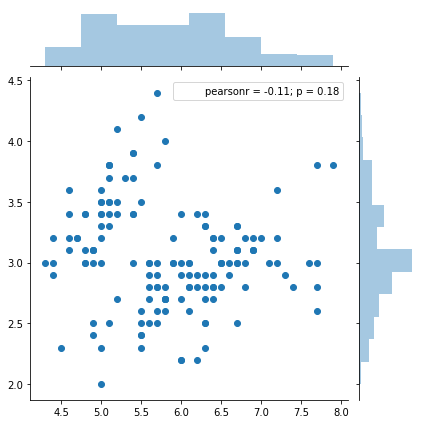

In [148]:
sns.jointplot(data1[:,0], data1[:,1])
plt.show()

/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


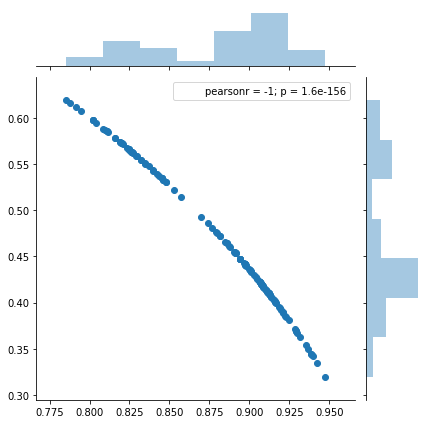

In [149]:
sns.jointplot(data3[:,0], data3[:,1])
plt.show()

### 인코딩

    - 독립변수 인코딩 : 5가지
    - 종속변수 인코딩 : 2가지

### 독립변수 인코딩
### one-hot-encoder

In [169]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

In [170]:
X = np.array([[0],[1],[2]])

In [171]:
X

array([[0],
       [1],
       [2]])

In [172]:
ohe.fit_transform(X).toarray()

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [174]:
ohe.n_values_, ohe.feature_indices_, ohe.active_features_

(array([3]), array([0, 3]), array([0, 1, 2]))

In [178]:
X = np.array([[0,0,4],
              [1,1,0],
              [1,0,2]])

In [179]:
ohe.fit(X)

OneHotEncoder(categorical_features='all', dtype=<class 'numpy.float64'>,
       handle_unknown='error', n_values='auto', sparse=True)

In [180]:
ohe.transform(X).toarray()

array([[1., 0., 1., 0., 0., 0., 1.],
       [0., 1., 0., 1., 1., 0., 0.],
       [0., 1., 1., 0., 0., 1., 0.]])

In [181]:
ohe.n_values_, ohe.feature_indices_, ohe.active_features_

(array([2, 2, 5]), array([0, 2, 4, 9]), array([0, 1, 2, 3, 4, 6, 8]))

In [182]:
# one hot encoding 시 특정 feature만 인코딩 원할 때
ohe = OneHotEncoder(categorical_features=[False, True, False])
ohe.fit_transform(X).toarray()

array([[1., 0., 0., 4.],
       [0., 1., 1., 0.],
       [1., 0., 1., 2.]])

In [183]:
ohe.n_values_, ohe.feature_indices_, ohe.active_features_

(array([2]), array([0, 2]), array([0, 1]))

### imputer

    : 누락된 정보를 채우는 변환

In [185]:
from sklearn.preprocessing import Imputer
# imputer 객체 만들기
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
imp.fit_transform([[1,2],[np.nan,3],[7,6]])

array([[1., 2.],
       [4., 3.],
       [7., 6.]])

In [187]:
X = np.array([[1,2,3],[4,5,6],[7,np.nan,9]])

In [198]:
imp = Imputer(missing_values='NaN', strategy='median', axis=1)
imp.fit_transform(X)

array([[1., 2., 3.],
       [4., 5., 6.],
       [7., 8., 9.]])

### binarizer

    : 기준값을 기준으로 결과를 0, 1로 나눈다 디폴트 기준값은 0

In [199]:
from sklearn.preprocessing import Binarizer
X = [[1, -1, 2],
     [2, 0, 0],
     [0, 1, -1]]

In [200]:
binarizer = Binarizer().fit(X)
binarizer.transform(X)

array([[1, 0, 1],
       [1, 0, 0],
       [0, 1, 0]])

In [203]:
# threshold 설정해서 0과 1로 나누기
binarizer = Binarizer(threshold=0.5)

In [204]:
X = [[0.4, 0.1, 0.7],
     [0.35, 0.67, 0.45],
     [0.35, 0.65, 0.5]]

In [205]:
binarizer.fit_transform(X)

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.]])

### PolynomialFeatures

    : 입력값 x를 다항식으로 변환한다.

In [206]:
from sklearn.preprocessing import PolynomialFeatures
X = np.arange(6).reshape(3,2)
X

array([[0, 1],
       [2, 3],
       [4, 5]])

In [208]:
# interaction_only=True 하게 되면 제곱된것 나오지 않고 두 feature의 곱만 나온다.
poly = PolynomialFeatures(2, interaction_only=True, include_bias=True)
poly.fit_transform(X)

array([[ 1.,  0.,  1.,  0.],
       [ 1.,  2.,  3.,  6.],
       [ 1.,  4.,  5., 20.]])

In [209]:
poly = PolynomialFeatures(2, interaction_only=False, include_bias=True)
poly.fit_transform(X)

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

### Function Transformer

    : 사용자가 원하는 함수를 적용해 값을 변경할 수 있다.

In [215]:
from sklearn.preprocessing import FunctionTransformer

def kernel(X):
    x0 = X[:,:1]
    x1 = X[:,1:2]
    x2 = X[:,2:3]
    X_new = np.hstack([x0, 2*x1, x2**2, np.log(x1)])
    return X_new

In [216]:
X = np.arange(12).reshape(4,3)
X

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [217]:
kernel(X)

array([[  0.        ,   2.        ,   4.        ,   0.        ],
       [  3.        ,   8.        ,  25.        ,   1.38629436],
       [  6.        ,  14.        ,  64.        ,   1.94591015],
       [  9.        ,  20.        , 121.        ,   2.30258509]])

In [218]:
# FunctionTransformer(함수).fit_transform(데이터)
FunctionTransformer(kernel).fit_transform(X)

array([[  0.        ,   2.        ,   4.        ,   0.        ],
       [  3.        ,   8.        ,  25.        ,   1.38629436],
       [  6.        ,  14.        ,  64.        ,   1.94591015],
       [  9.        ,  20.        , 121.        ,   2.30258509]])

### 종속변수 인코딩
### Label Encoder

    : 라벨을 인코딩하거나 다시되돌리기

In [219]:
from sklearn.preprocessing import LabelEncoder

In [223]:
le = LabelEncoder()
y = ['A','B','C','B','A','C']

In [230]:
le.fit(y)
y2 = le.transform(y)
y2, le.classes_

(array([0, 1, 2, 1, 0, 2]), array(['A', 'B', 'C'], dtype='<U1'))

In [229]:
le.inverse_transform(y2)

/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array(['A', 'B', 'C', 'B', 'A', 'C'], dtype='<U1')

### Label Binarizer
    
    : 종속변수를 one hot encoding 한다.

In [231]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
y = ['A','B','C','B','A','C','A','B', 'C', 'C', 'A', 'C', 'B']
lb.fit(y)

LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)

In [232]:
lb.classes_

array(['A', 'B', 'C'], dtype='<U1')

In [233]:
y2 = lb.transform(y)
y2

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0]])

In [234]:
lb.inverse_transform(y2)

array(['A', 'B', 'C', 'B', 'A', 'C', 'A', 'B', 'C', 'C', 'A', 'C', 'B'],
      dtype='<U1')